In [34]:
import cinrad
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
import gridfs
import scipy
import numpy as np
from datetime import datetime

Variables: {'azimuth': <class 'netCDF4._netCDF4.Variable'>
float64 azimuth(azimuth)
    _FillValue: nan
unlimited dimensions: 
current shape = (360,)
filling on, 'distance': <class 'netCDF4._netCDF4.Variable'>
float64 distance(distance)
    _FillValue: nan
unlimited dimensions: 
current shape = (460,)
filling on, 'HSR': <class 'netCDF4._netCDF4.Variable'>
float64 HSR(azimuth, distance)
    _FillValue: nan
unlimited dimensions: 
current shape = (360, 460)
filling on, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float64 longitude(azimuth, distance)
    _FillValue: nan
unlimited dimensions: 
current shape = (360, 460)
filling on, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float64 latitude(azimuth, distance)
    _FillValue: nan
unlimited dimensions: 
current shape = (360, 460)
filling on, 'height': <class 'netCDF4._netCDF4.Variable'>
float64 height(azimuth, distance)
    _FillValue: nan
unlimited dimensions: 
current shape = (360, 460)
filling on}
Dimensions: {'azimuth': <class 'n

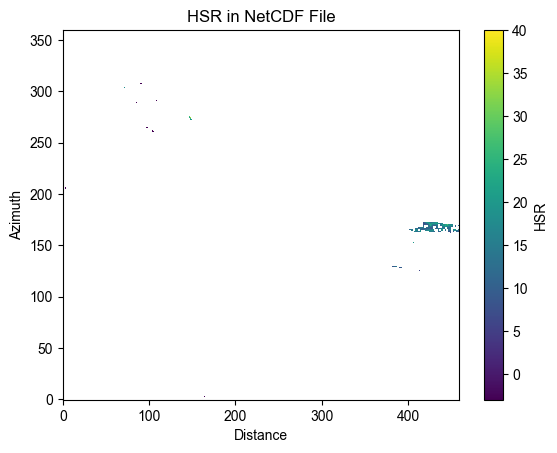

In [15]:
# 打开 NetCDF 文件

dataset = nc.Dataset("D:/RadarData/2022.678nc/HSR/Z9010_20220819000000Z_HSR_00_033.nc")

# 查看文件中的变量和维度
print("Variables:", dataset.variables)
print("Dimensions:", dataset.dimensions)

# 选择一个变量并查看其值
selected_variable = 'HSR'  
variable_data = dataset.variables[selected_variable][:]

# 绘制变量的图像
plt.imshow(variable_data, origin='lower', aspect='auto')
plt.colorbar(label=selected_variable)
plt.title(f"{selected_variable} in NetCDF File")
plt.xlabel("Distance")
plt.ylabel("Azimuth")
plt.show()

# 关闭 NetCDF 文件
dataset.close()

In [16]:
data=cinrad.io.StandardPUP("D:/RadarData/2022.8.19-21/HSR/Z9010_20220819000000Z_HSR_00_033").get_data()
data

<xarray.Dataset>
Dimensions:    (azimuth: 360, distance: 460)
Coordinates:
  * azimuth    (azimuth) float64 0.0 0.0175 0.035 0.05251 ... 6.248 6.266 6.283
  * distance   (distance) float64 0.5 1.0 1.5 2.0 ... 228.5 229.0 229.5 230.0
Data variables:
    HSR        (azimuth, distance) float64 nan nan nan nan ... nan nan nan nan
    longitude  (azimuth, distance) float64 116.5 116.5 116.5 ... 116.5 116.5
    latitude   (azimuth, distance) float64 39.81 39.82 39.82 ... 41.88 41.88
    height     (azimuth, distance) float64 0.03301 0.03306 ... 3.131 3.145
Attributes:
    elevation:        0
    range:            230.0
    scan_time:        2022-08-19 00:00:01
    site_code:        Z9010
    site_name:        北京SA
    site_longitude:   116.47195
    site_latitude:    39.808887
    tangential_reso:  0.5
    task:             VCP21D

In [17]:
from datetime import datetime
ncFile=nc.Dataset("D:/RadarData/2022.8.19-21nc/HSR/Z9010_20220819000001Z_HSR_00_033.nc")
my_metadata = {}
my_metadata["station_id"] = str(ncFile.__getattr__("site_code"))
my_metadata["station_name"] = str(ncFile.__getattr__("site_name"))
scan_time_dt = datetime.strptime(ncFile.scan_time, '%Y-%m-%d %H:%M:%S')
my_metadata['valid_time'] = int(scan_time_dt.strftime('%Y%m%d%H%M%S'))

if 'start_time' in var_list:
    my_metadata['start_time'] = int(ncFile['start_time'][0].item())

# get the type of rainfall variable
my_variable = None
if 'HSR' in var_list:
    my_variable = 'HSR'
if 'rain_rate' in var_list:
    my_variable = 'rain_rate'

if my_variable is not None:
    my_metadata['variable'] = my_variable
else:
    print("Valid rainfall variable not found")
    print(f"{var_list=}")
# calculate the stats for this field
rain = ncFile[my_variable][:]
my_metadata["mean"] = rain.mean()
my_metadata["std"] = rain.std()
rain_area = (rain >= 0.05).sum()
valid_area = rain.count()
my_metadata["war"] = rain_area / valid_area

In [18]:
# # 指定包含数据文件的文件夹路径
# folder_path = 'E:/data/HSR'
# new_path='D:/RadarData/2022.8.19-21nc/HSR/'
# # 获取文件夹中的所有文件名
# file_names = os.listdir(folder_path)

# # 遍历每个文件并转换成NetCDF
# for file_name in file_names:
#     # 拼接文件的完整路径
#     file_path = os.path.join(folder_path, file_name)
    
#     # 加载文件
#     radar_data = cinrad.io.StandardPUP(file_path).get_data()
    
#     # 指定保存的文件路径，这里将原文件名的扩展名替换为.nc
#     nc_file_path = os.path.join(new_path, os.path.splitext(file_name)[0] + '.nc')
    
#     # 将数据保存为NetCDF文件
#     radar_data.to_netcdf(nc_file_path)
    
#     # 关闭数据集，释放资源
#     radar_data.close()


In [19]:
# # 指定包含数据文件的文件夹路径
# folder_path = 'E:/data/HSR/'
# new_path = 'D:/RadarData/2022.8.19-21nc/HSR/'

# # 获取文件夹中的所有文件名
# file_names = os.listdir(folder_path)

# # 获取已处理的文件列表（不考虑后缀）
# processed_file_list_path = 'D:/RadarData/2022.8.19-21nc/processed_files.txt'
# try:
#     # 读取已处理文件列表，获取基础部分（不考虑后缀）
#     with open(processed_file_list_path, 'r') as file:
#         processed_files = [os.path.splitext(line)[0] for line in file.read().splitlines()]
# except FileNotFoundError:
#     processed_files = []

# # 读取 new_path 文件夹中已存在的文件名的基础部分（不考虑后缀）
# processed_files_in_new_path = [os.path.splitext(file_name)[0] for file_name in os.listdir(new_path)]

# # 将已存在的文件基础部分加入已处理列表
# processed_files.extend(processed_files_in_new_path)

# # 遍历每个文件并转换成 NetCDF
# for file_name in file_names:
#     # 检查文件是否已处理
#     if os.path.splitext(file_name)[0] in processed_files:
#         print(f"Skipping already processed file: {file_name}")
#         continue

#     # 拼接文件的完整路径
#     file_path = os.path.join(folder_path, file_name)

#     try:
#         # 加载文件
#         radar_data = cinrad.io.StandardPUP(file_path).get_data()

#         # 指定保存的文件路径，这里将原文件名的扩展名替换为 .nc
#         nc_file_path = os.path.join(new_path, os.path.splitext(file_name)[0] + '.nc')

#         # 将数据保存为 NetCDF 文件
#         radar_data.to_netcdf(nc_file_path)

#         print(f"Converted {file_name} to NetCDF: {nc_file_path}")

#         # 记录已处理的文件
#         with open(processed_file_list_path, 'a') as file:
#             file.write(os.path.splitext(file_name)[0] + '\n')

#     except Exception as e:
#         print(f"Error processing file {file_name}: {e}")




In [20]:
# # 获取文件夹中的所有文件名
# set_a = set(os.listdir('E:/data/HSR'))

# # 获取目标文件夹中的文件名
# name = os.listdir('D:/RadarData/2022.678nc/HSR')

# # 提取文件名的基础部分（不包括后缀）
# set_b = set(os.path.splitext(file_name)[0] for file_name in name)

# # 输出两个集合的差集（在 set_a 中但不在 set_b 中的元素）
# result = set_a - set_b
# print(result)


In [21]:
import netCDF4 as nc

ds_in = nc.Dataset("D:/RadarData/2022.678nc/HSR/Z9010_20220601000000Z_HSR_00_033.nc")

In [22]:
ds_in.dimensions

{'azimuth': <class 'netCDF4._netCDF4.Dimension'>: name = 'azimuth', size = 360,
 'distance': <class 'netCDF4._netCDF4.Dimension'>: name = 'distance', size = 460}

In [23]:
var_list = dataset.variables.keys()
print(var_list)


dict_keys(['azimuth', 'distance', 'HSR', 'longitude', 'latitude', 'height'])


In [43]:
number_rows = ds_in.dimensions['azimuth'].size
number_cols = ds_in.dimensions['distance'].size

data_shape = (number_rows, number_cols)
accum_rain = np.zeros(data_shape, dtype=np.float64)
in_rain = ds_in["HSR"][:]
scan_time_dt = datetime.strptime(ds_in.scan_time, '%Y-%m-%d %H:%M:%S')
valid_time = str(scan_time_dt.strftime('%Y%m%d%H%M%S'))

accum_rain = np.add(accum_rain, in_rain)
print(valid_time)

20220601000001


In [37]:
data_shape


(360, 460)

In [38]:
accum_rain

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=nan)

In [39]:
in_rain

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=nan)

In [40]:
valid_time

20220601000001